# CASA0007 - Quantitative Methods Group Project
## Group 25

In [1]:
#Reading in libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Context of the data

### 1.0. Aggregation Level - Zach

Data is aggregated to the Output Area (OA) Level. This being the smallest level of aggregation that the census data is released on by the ONS (Office of National Statistics). 
- Each OA contains between 40 and 250 households, leading to an estimated population of between 100 and 625. 
- **Limitation** of aggregation level: OAs change between each census (10 year lifecycle) due to variation in population density, meaning data cannot always be compared between census' easily. 




**UK Administrative Units**
1. Output Areas (OAs)
2. Lower Super Output Areas (LSOAs)
3. Middle layer Super Output Areas (MSOAs)
4. Boroughs/ Local Administrative Unit (LAD)


### 1.1. Cycling Behaviour
This dataset reports level of cycling activity across local authority districts in England. The data are collected from the Active Lives Survey (ALS), a bi-annual residential household survey administered by Sport England. Sport England is an independent government body associated with the Department for Digital, Culture, Media and Sport.  

The dataset used covers the period mid-November 2018 to  mid-November 2019. The dataset can be found [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1100942/cw0302.ods).

**Cycling to work: Census Data (OLD)**  
This dataset is from the 2011 Census. Results are based off a Census question that classifies usual residents aged 16 to 74 in England and Wales by their method of travel to work, disaggregated by Census Output Area (OA). The estimates are as at census day, 27 March 2011 (single time snapshot). The dataset can be found [here](https://www.nomisweb.co.uk/census/2011/qs701ew).

### 1.2. Deprivation - Yubin

The dataset measured the index of deprivation based on seven different domains across 319 local authority districts in England, published by the Ministry of Housing, Communities and Local Government on 26 September 2019.

The seven domains in the measure of deprivation are:
1. Income Deprivation: The proportion of the population experiencing deprivation relating to low income group, those people that are out-of-work or low earnings  
2. Employment Deprivation: The proportion of the working-age population in an area who are excluded from the labor market due to unemployment, sickness or disability, or caring responsibilities.
3. Education, Skills and Training Deprivation: The lack of attainment and skills in the local population. The indicators fall into two sub-domains: one relating to children and young people and one relating to adult skills. 
4. Health Deprivation and Disability: The risk of premature death and the impairment of quality of life through poor physical or mental health. 
5. Crime: The risk of personal and material victimization at local level. 
6. Barriers to Housing and Services: The physical and financial accessibility of housing and local services, including the access to affordable housing and the physical proximity of local services
7. Living Environment Deprivation: The quality of the local environment includes the quality of housing, neighborhood air quality and road traffic accidents.



### 1.3. Air Quality - Zach [[Data](https://data.london.gov.uk/dataset/pm2-5-map-and-exposure-data)]

This dataset identifies modelled PM<sub>2.5 </sub>(particulate matter of diameter 2.5 micrometers or less) across London's Output Areas. 
- Modelled by Tfl (Transport for London) and GLA (Greater London Authority)

Increased exposure to high levels of partculate matter have been linked to increased rate of cardiovascular and respiratory disease (Liu, 2019). 

This data is being considered due to the assumption that emission levels infulence the decision making process of commuters. This emissions data could be used as a proxy for volume of motor vehicles, or considered as a variable having an impact by itself on decision making.



| Variable| Unit | Description |
| --- | --- | --- |
| PM<sub>2.5 </sub> | µg/m<sup>3 </sup>| Modelled concentration of particulate matter with diameter or 2.5 micrometers or less. | 


**Limitations:**
- Assuming causality of air quality and commuting choice would be incorrect. It is possible that air pollution is low due to choice of pollution. Suggesting an inverse relationship to that initally proposed. 


### 1.4. Cycle Sharing

## 2. Description of data fields/ variables

### 2.1. Cycling Behaviour - Joe
* Read in the data

In [54]:
cycling_2019 = pd.read_csv('data/2019_cycling.csv')
print(cycling_2019.columns)
print(cycling_2019.shape)

Index(['Local Authority District code (2019)',
       'Local Authority District name (2019', 'Any cycling Once per month',
       'Any cycling Once per week', 'Any cycling Three times per week',
       'Any cycling Five times per week', 'Cycling for leisure Once per month',
       'Cycling for leisure Once per week',
       'Cycling for leisure Three times per week',
       'Cycling for leisure Five times per week',
       'Cycling for travel Once per month', 'Cycling for travel Once per week',
       'Cycling for travel Three times per week',
       'Cycling for travel Five times per week'],
      dtype='object')
(375, 14)


* Drop rows with missing data, and aggregate rows (i.e. region totals) to leave only one row per local authority

In [44]:
cycling_2019.dropna(subset=['Local Authority District name (2019'], inplace=True)
print(cycling_2019.shape)

(361, 14)


In [51]:
regex = '^E0'
cycling_2019 = cycling_2019[ cycling_2019['Local Authority District code (2019)'].str.match(regex)==True ]

In [52]:
cycling_2019.dtypes

Local Authority District code (2019)         object
Local Authority District name (2019          object
Any cycling Once per month                  float64
Any cycling Once per week                   float64
Any cycling Three times per week            float64
Any cycling Five times per week             float64
Cycling for leisure Once per month          float64
Cycling for leisure Once per week           float64
Cycling for leisure Three times per week    float64
Cycling for leisure Five times per week     float64
Cycling for travel Once per month           float64
Cycling for travel Once per week            float64
Cycling for travel Three times per week     float64
Cycling for travel Five times per week      float64
dtype: object

In [53]:
cycling_2019.head(5)

,Local Authority District code (2019),Local Authority District name (2019,Any cycling Once per month,Any cycling Once per week,Any cycling Three times per week,Any cycling Five times per week,Cycling for leisure Once per month,Cycling for leisure Once per week,Cycling for leisure Three times per week,Cycling for leisure Five times per week,Cycling for travel Once per month,Cycling for travel Once per week,Cycling for travel Three times per week,Cycling for travel Five times per week
2,E06000047,County Durham,10.0,7.0,2.4,1.5,9.6,6.2,1.5,0.7,1.2,1.2,0.9,0.5
3,E06000005,Darlington,12.9,9.4,3.8,2.6,10.5,7.6,2.7,1.1,6.7,3.3,2.1,1.0
4,E06000001,Hartlepool,8.7,6.0,2.9,1.3,8.0,5.5,1.5,0.2,3.2,1.7,0.9,0.9
5,E06000002,Middlesbrough,11.6,7.1,3.3,2.9,9.9,4.8,2.4,2.0,4.6,3.9,2.6,1.9
6,E06000057,Northumberland,13.6,9.7,4.4,2.1,13.6,9.3,4.0,1.6,2.5,2.1,1.0,0.5


The relevant fields for our analysis are as follows:  
| Field name  | Data type  | Description  |
|---|---|---|
| Local Authority District code  | String  | Local authority unique identifier.  |
| Local Authority District name  | String  | Local authority name.  |
| Any cycling (Once per month/Once per week/Three times per week/Five times per week  | Float (Ratio data) | Percentage of people aged 16 and over who self-report any form of cycling (leisure or travel) at least *x* frequency.  |
| Cycling for leisure (Once per month/Once per week/Three times per week/Five times per week  | Float (Ratio data)  | Percentage of people aged 16 and over who self-report cycling for leisure at least *x* frequency.  *Leisure* in this table refers to walking or cycling for the purpose of health, recreation, training or competition, not to get from place to place.  |
| Cycling for travel (Once per month/Once per week/Three times per week/Five times per week  | Float (Ratio data)  | Percentage of people aged 16 and over who self-report cycling for travel at least *x* frequency.  |

### 2.2. Deprivation

In [12]:
depri_income_2019 = pd.read_csv('https://raw.githubusercontent.com/ZacharyP-E/qm_group25/main/data/2019_Deprivation_income.csv')
depri_income_2019.head(10)

,Local Authority District code (2019),Local Authority District name (2019),Income - Average rank,Income - Rank of average rank,Income - Average score,Income - Rank of average score,Income - Proportion of LSOAs in most deprived 10% nationally,Income - Rank of proportion of LSOAs in most deprived 10% nationally,Income scale,Rank of Income Scale
0,E06000001,Hartlepool,23509.14,16,0.228,5,0.3793,7,21084,110
1,E06000002,Middlesbrough,23950.79,9,0.251,1,0.5000,1,34959,59
2,E06000003,Redcar and Cleveland,20604.49,50,0.186,28,0.2614,24,25142,96
3,E06000004,Stockton-on-Tees,18291.93,99,0.164,51,0.2167,33,31750,74
4,E06000005,Darlington,18361.47,94,0.153,69,0.1846,41,16208,133
5,E06000006,Halton,20664.75,48,0.185,30,0.2911,15,23382,101
6,E06000007,Warrington,14196.32,179,0.109,154,0.0630,116,22389,107
7,E06000008,Blackburn with Darwen,23232.88,18,0.212,10,0.3297,10,31358,75
8,E06000009,Blackpool,25404.24,1,0.247,3,0.3617,8,34610,61
9,E06000010,"Kingston upon Hull, City of",23888.21,11,0.227,6,0.4217,4,58544,14


### 2.3. Air Quality - Zach

In [4]:
#Reading in data
aq_df = pd.read_csv("data/OA2_PM25_2013.csv")

In [6]:
#Identifying usable columns
aq_df.head()

,OA11CD,LAD11NM,PM252013me
0,E00024024,Westminster,17.953073
1,E00023833,Westminster,18.183844
2,E00023830,Westminster,18.732058
3,E00023831,Westminster,17.909357
4,E00024021,Westminster,17.185809


Columns:
- OA11CD refers to the unique Output Area code, allowing merging with other data as an explanatory variable. 
- LAD11NM refers to the Borough (three levels of aggregation above OAs) that the OA is within. Boroughs are local administrative units that resources are allocatacted to, which are then distributed across the OAs dependnent on needs. 

### 2.4. Cycle Sharing

## 3. Summary statistic fields

### 3.1. Cycling behaviour - Joe

### 3.2. Deprivation - Yubin

### 3.3. Air Quality - Zach

In [11]:
aq_df.describe()

,PM252013me
count,25946.000000
mean,16.001274
std,0.788874
min,14.283266
25%,15.417784
50%,15.873302
75%,16.464573
max,21.100099


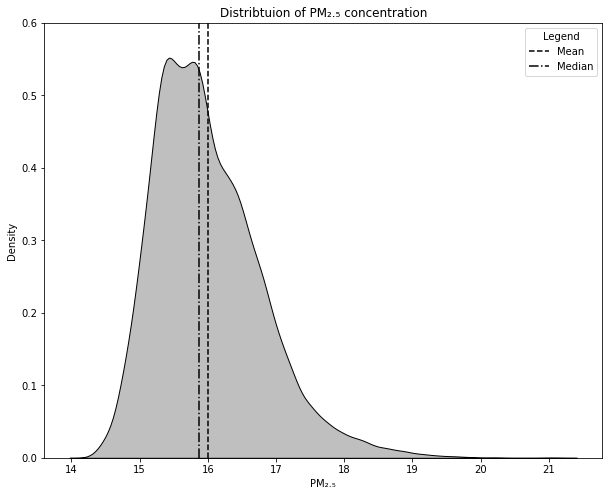

In [48]:
fig, ax = plt.subplots(1, figsize=(10,8))
sns.kdeplot(aq_df["PM252013me"], ax=ax, color="black", shade=True)
plt.xlabel("PM\u2082.\u2085")
plt.vlines(aq_df["PM252013me"].mean(), 0, 0.65, linestyle="--", color="black", label="Mean")
plt.vlines(aq_df["PM252013me"].median(), 0, 0.65, linestyle="-.", color="black", label="Median")
plt.legend(title="Legend")
plt.title("Distribtuion of PM\u2082.\u2085 concentration")
plt.ylim(0,0.60)
plt.savefig("figures/aq_kdeplot.png", dpi=300, facecolor="white", bbox_inches="tight")
plt.show()

Data appears to be positvely skewed. Would applying a log fix it?

In [89]:
aq_df["dif_mean"] = aq_df["PM252013me"] - aq_df["PM252013me"].mean()

In [96]:
aq_df["dif_mean_and_std"] = aq_df["dif_mean"] / aq_df["PM252013me"].std()

In [93]:
#Applying a log function to the data
aq_df["PMlog"] = np.log(aq_df["PM252013me"])

None of which normalise the data

### 3.4. Cycle Sharing - 

## 4. Appropriate plots to communicate distribution

### 4.0. Merging of data - Zach

In [52]:
#ZPE importing here as importing from link didn't work for me
deprivation = pd.read_csv("data/deprivation_oa.csv")

In [65]:
#Merging the cycle to work data to deprivation data to form a main dataframe
df = cycletowork.merge(deprivation, how="left", on="geography code")

In [67]:
#Adding the air quality data to the main dataframe
df = df.merge(aq_df, how = "left", left_on="geography code", right_on="OA11CD")

In [74]:
#Identifying any NA values
df.isna().sum().reset_index().rename(columns={"index":"Column Name", 0:"Quantity of NAs"})

,Column Name,Quantity of NAs
0,date_x,0
1,geography code,0
2,Method of Travel to Work: Bicycle; measures: V...,0
3,Method of Travel to Work: All categories: Meth...,0
4,date_y,0
5,geography,0
6,Rural Urban,0
7,Household Deprivation: All categories: Classif...,0
8,Household Deprivation: Household is not depriv...,0
9,Household Deprivation: Household is deprived i...,0


No NA values present within the dataset

In [77]:
#Removing any duplicated rows.
df = df.drop_duplicates(keep="first")

### 4.0 Merging Data Attempt 1 - YUBIN

In [13]:
income_1 = depri_income_2019.merge(cycling_2019, how="left", on="Local Authority District code (2019)")

In [14]:
income_1.isna().sum().reset_index().rename(columns={"index":"Column Name", 0:"Quantity of NAs"})

,Column Name,Quantity of NAs
0,Local Authority District code (2019),0
1,Local Authority District name (2019),0
2,Income - Average rank,0
3,Income - Rank of average rank,0
4,Income - Average score,0
5,Income - Rank of average score,0
6,Income - Proportion of LSOAs in most deprived ...,0
7,Income - Rank of proportion of LSOAs in most d...,0
8,Income scale,0
9,Rank of Income Scale,0


In [15]:
income_1 = income_1.drop_duplicates(keep="first")

In [21]:
income_1.head(20)

,Local Authority District code (2019),Local Authority District name (2019),Income - Average rank,Income - Rank of average rank,Income - Average score,Income - Rank of average score,Income - Proportion of LSOAs in most deprived 10% nationally,Income - Rank of proportion of LSOAs in most deprived 10% nationally,Income scale,Rank of Income Scale,...,Any cycling Three times per week,Any cycling Five times per week,Cycling for leisure Once per month,Cycling for leisure Once per week,Cycling for leisure Three times per week,Cycling for leisure Five times per week,Cycling for travel Once per month,Cycling for travel Once per week,Cycling for travel Three times per week,Cycling for travel Five times per week
0,E06000001,Hartlepool,23509.14,16,0.228,5,0.3793,7,21084,110,...,2.9,1.3,8.0,5.5,1.5,0.2,3.2,1.7,0.9,0.9
1,E06000002,Middlesbrough,23950.79,9,0.251,1,0.5000,1,34959,59,...,3.3,2.9,9.9,4.8,2.4,2.0,4.6,3.9,2.6,1.9
2,E06000003,Redcar and Cleveland,20604.49,50,0.186,28,0.2614,24,25142,96,...,4.7,2.5,15.8,13.3,2.7,0.9,7.8,4.4,1.7,0.3
3,E06000004,Stockton-on-Tees,18291.93,99,0.164,51,0.2167,33,31750,74,...,3.4,1.4,11.9,6.9,1.4,0.9,7.2,6.1,0.9,0.5
4,E06000005,Darlington,18361.47,94,0.153,69,0.1846,41,16208,133,...,3.8,2.6,10.5,7.6,2.7,1.1,6.7,3.3,2.1,1.0
5,E06000006,Halton,20664.75,48,0.185,30,0.2911,15,23382,101,...,5.9,3.3,10.6,8.1,3.8,1.9,5.4,4.8,2.9,2.4
6,E06000007,Warrington,14196.32,179,0.109,154,0.0630,116,22389,107,...,6.9,4.8,14.1,9.8,5.5,3.6,8.1,6.7,2.4,2.1
7,E06000008,Blackburn with Darwen,23232.88,18,0.212,10,0.3297,10,31358,75,...,2.5,1.8,7.5,4.6,2.1,1.5,4.6,1.1,0.3,0.0
8,E06000009,Blackpool,25404.24,1,0.247,3,0.3617,8,34610,61,...,3.6,2.6,14.8,7.5,1.7,0.7,6.6,5.8,2.2,1.8
9,E06000010,"Kingston upon Hull, City of",23888.21,11,0.227,6,0.4217,4,58544,14,...,7.8,3.5,12.2,8.7,3.9,0.4,11.0,7.5,4.7,1.5


### 4.1. Basic Plotting

Need to normalise both deprivation and cycle to work datasets before using!

#### 4.1.1 Cycle to work and Deprivation

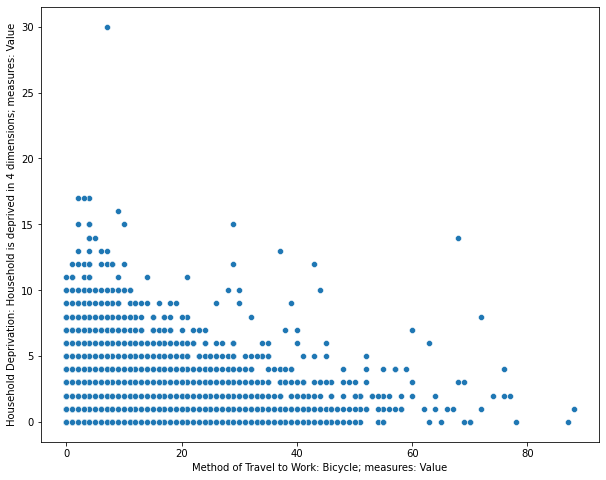

In [113]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.scatterplot(data = df, x="Cycling for travel Once per week", 
            y="Household Deprivation: Household is deprived in 4 dimensions; measures: Value", ax=ax)
                       
plt.show()

Hard to identify relationship? Might be difficult to plot a regression line.

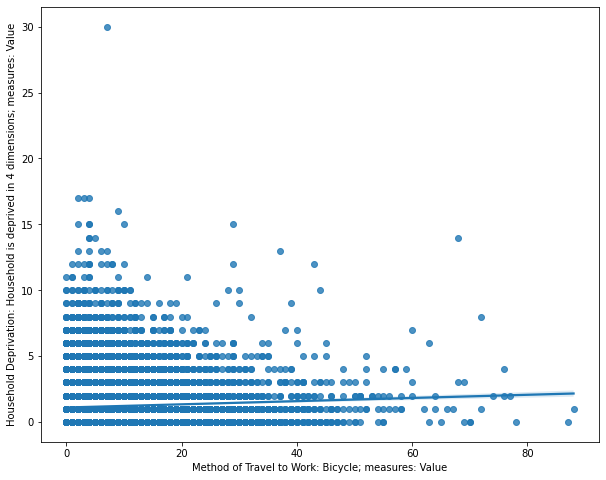

In [115]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.regplot(data = df, x="Method of Travel to Work: Bicycle; measures: Value", 
            y="Household Deprivation: Household is deprived in 4 dimensions; measures: Value", ax=ax)
                       
plt.show()

Regression plot reveals no majour relationship. Suggesting it is unlikely that deprevation of 

#### 4.1.2 Cycle to work and Pollution

In [118]:
#Cycle to work proportion
df["ctw_prop"]  = df["Method of Travel to Work: Bicycle; measures: Value"] / df["Method of Travel to Work: All categories: Method of travel to work; measures: Value"] 

In [120]:
#Deprivation on 4 dimensions proportion
df["dep4_prop"]  = df["Household Deprivation: Household is deprived in 4 dimensions; measures: Value"] / df["Method of Travel to Work: All categories: Method of travel to work; measures: Value"] 

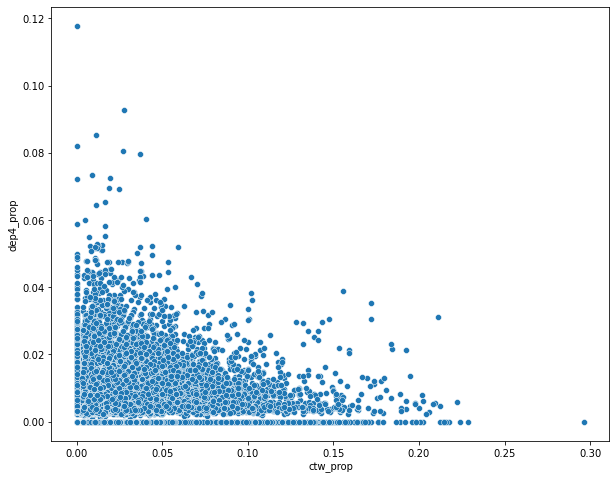

In [121]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.scatterplot(data = df, x="ctw_prop", 
            y="dep4_prop", ax=ax)
                       
plt.show()

#### 4.1.3 Cycling to Deprivation

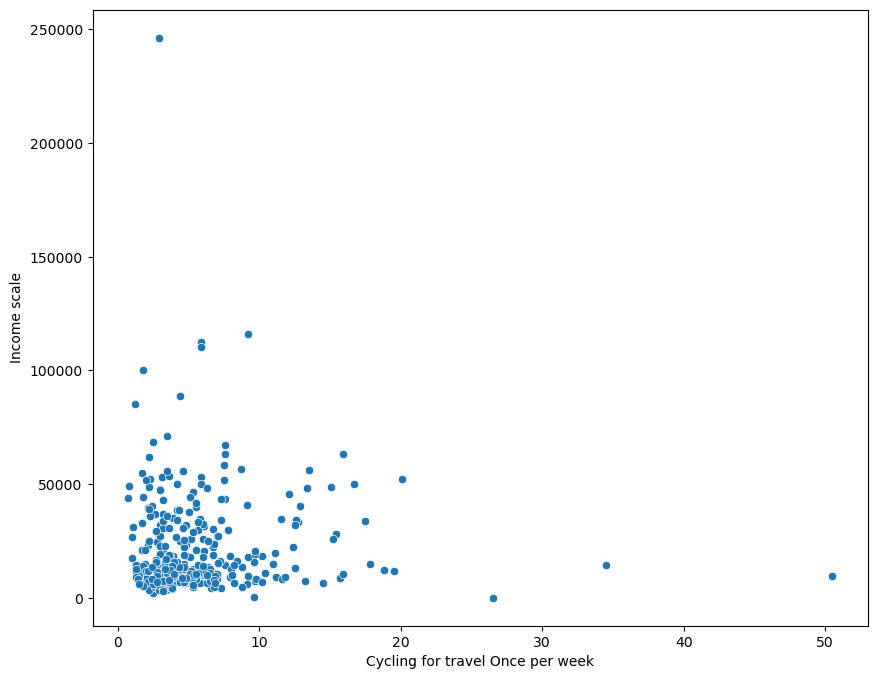

In [22]:
fig, ax = plt.subplots(1, figsize = (10,8))
sns.scatterplot(data = income_1, x="Cycling for travel Once per week", 
            y="Income scale", ax=ax)
                       
plt.show()

# 4.2. Appropriate plots to illustrate relationship between key fields

# References

Liu, C., Chen, R., Sera, F., Vicedo-Cabrera, A.M., Guo, Y., Tong, S., Coelho, M.S., Saldiva, P.H., Lavigne, E., Matus, P. and Valdes Ortega, N., 2019. Ambient particulate air pollution and daily mortality in 652 cities. New England Journal of Medicine, 381(8), pp.705-715.